# Stochastic GD


Gradient Descent Algorithm is an iterative algorithm used to solve the optimization problem. In almost every Machine Learning and Deep Learning models Gradient Descent is actively used to improve the learning of our algorithm.
we 'll get to know how a Gradient Descent Algorithm actually works. At the end of this blog, we’ll compare our custom SGD implementation with SKlearn’s SGD implementation

### importing libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

### split your data before scaling to avoid the data leakage problem.

In [2]:
X = load_boston().data
Y = load_boston().target

In [3]:
# split the data set into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

### Use Standard Scalar function to standardize your dataset. Here, we only fit the train data because we don’t want our model to see this data before, so as to avoid overfitting.

In [4]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
X_train = pd.DataFrame(data = X_train, columns=load_boston().feature_names)
X_train['Price'] = list(y_train)  
X_test = pd.DataFrame(data = X_test, columns=load_boston().feature_names)
X_test['Price'] = list(y_test)

In [6]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,-0.207356,-0.499979,1.548016,-0.263603,0.588213,-1.839367,1.107402,-1.125110,-0.618160,0.206735,1.227257,0.424543,3.108073,14.4
1,-0.388865,0.346774,-0.589747,-0.263603,-0.797821,0.327487,-0.367661,0.075090,-0.733637,-1.049493,0.056963,0.401853,-0.666430,24.4
2,-0.335735,-0.499979,1.548016,-0.263603,0.588213,0.037907,1.043114,-0.799984,-0.618160,0.206735,1.227257,0.398461,0.639367,18.1
3,-0.394852,2.463658,-1.265584,-0.263603,-1.352235,0.052172,-1.746292,1.968937,-0.502683,-0.257013,-1.653466,0.089342,-1.056896,22.5
4,-0.391456,-0.499979,2.086394,-0.263603,0.215716,-0.495604,0.853820,-0.811511,-0.849114,-1.254951,0.282020,0.204545,0.776596,20.5


In [7]:
# implementing without sklearn library

In [8]:
def sgd_regressor(X, y, learning_rate=0.2, n_epochs=1000, k=40):#k=batchsize
    
    w = np.random.randn(1,13)  # Randomly initializing weights
    b = np.random.randn(1,1)   # Random intercept value
    
    epoch=1
    
    while epoch <= n_epochs:
        
        temp = X.sample(k)

        X_tr = temp.iloc[:,0:13].values
        y_tr = temp.iloc[:,-1].values
        
        Lw = w
        Lb = b
        
        loss = 0
        y_pred = []
        sq_loss = []
        
        for i in range(k):
              
            Lw = (-2/k * X_tr[i]) * (y_tr[i] - np.dot(X_tr[i],w.T) - b)
            Lb = (-2/k) * (y_tr[i] - np.dot(X_tr[i],w.T) - b)
            
            w = w - learning_rate * Lw
            b = b - learning_rate * Lb
            
            y_predicted = np.dot(X_tr[i],w.T)
            y_pred.append(y_predicted)
        
        loss = mean_squared_error(y_pred, y_tr)
            
        print("Epoch: %d, Loss: %.3f" %(epoch, loss))
        epoch+=1
        learning_rate = learning_rate/1.02
        
    return w,b

In [9]:
def predict(x,w,b):
    y_pred=[]
    for i in range(len(x)):
        temp_ = x
        X_test = temp_.iloc[:,0:13].values
        y = np.asscalar(np.dot(w,X_test[i])+b)
        y_pred.append(y)
    return np.array(y_pred)
w,b = sgd_regressor(X_train,y_train)
y_pred_customsgd = predict(X_test,w,b)

Epoch: 1, Loss: 430.832
Epoch: 2, Loss: 488.985
Epoch: 3, Loss: 492.816
Epoch: 4, Loss: 541.074
Epoch: 5, Loss: 514.650
Epoch: 6, Loss: 530.104
Epoch: 7, Loss: 580.118
Epoch: 8, Loss: 526.787
Epoch: 9, Loss: 534.941
Epoch: 10, Loss: 527.645
Epoch: 11, Loss: 494.395
Epoch: 12, Loss: 523.484
Epoch: 13, Loss: 549.209
Epoch: 14, Loss: 516.727
Epoch: 15, Loss: 482.369
Epoch: 16, Loss: 495.470
Epoch: 17, Loss: 525.247
Epoch: 18, Loss: 459.866
Epoch: 19, Loss: 541.464
Epoch: 20, Loss: 558.902
Epoch: 21, Loss: 546.707
Epoch: 22, Loss: 560.018
Epoch: 23, Loss: 485.478
Epoch: 24, Loss: 564.368
Epoch: 25, Loss: 542.728
Epoch: 26, Loss: 573.851
Epoch: 27, Loss: 526.347
Epoch: 28, Loss: 559.396
Epoch: 29, Loss: 506.218
Epoch: 30, Loss: 580.391
Epoch: 31, Loss: 523.936
Epoch: 32, Loss: 566.023
Epoch: 33, Loss: 546.966
Epoch: 34, Loss: 515.486
Epoch: 35, Loss: 506.437
Epoch: 36, Loss: 489.700
Epoch: 37, Loss: 509.370
Epoch: 38, Loss: 570.366
Epoch: 39, Loss: 469.503
Epoch: 40, Loss: 582.633
Epoch: 41

Epoch: 347, Loss: 541.150
Epoch: 348, Loss: 565.804
Epoch: 349, Loss: 547.483
Epoch: 350, Loss: 499.626
Epoch: 351, Loss: 531.928
Epoch: 352, Loss: 603.981
Epoch: 353, Loss: 574.267
Epoch: 354, Loss: 537.894
Epoch: 355, Loss: 515.685
Epoch: 356, Loss: 581.050
Epoch: 357, Loss: 540.659
Epoch: 358, Loss: 466.290
Epoch: 359, Loss: 531.826
Epoch: 360, Loss: 574.045
Epoch: 361, Loss: 487.367
Epoch: 362, Loss: 575.743
Epoch: 363, Loss: 493.323
Epoch: 364, Loss: 515.152
Epoch: 365, Loss: 564.248
Epoch: 366, Loss: 592.995
Epoch: 367, Loss: 510.500
Epoch: 368, Loss: 571.408
Epoch: 369, Loss: 588.893
Epoch: 370, Loss: 520.775
Epoch: 371, Loss: 550.424
Epoch: 372, Loss: 563.059
Epoch: 373, Loss: 582.373
Epoch: 374, Loss: 558.786
Epoch: 375, Loss: 530.829
Epoch: 376, Loss: 547.993
Epoch: 377, Loss: 516.946
Epoch: 378, Loss: 563.548
Epoch: 379, Loss: 543.000
Epoch: 380, Loss: 471.882
Epoch: 381, Loss: 492.973
Epoch: 382, Loss: 586.099
Epoch: 383, Loss: 553.212
Epoch: 384, Loss: 558.545
Epoch: 385, 

Epoch: 722, Loss: 567.944
Epoch: 723, Loss: 531.286
Epoch: 724, Loss: 491.935
Epoch: 725, Loss: 510.004
Epoch: 726, Loss: 512.019
Epoch: 727, Loss: 504.223
Epoch: 728, Loss: 499.873
Epoch: 729, Loss: 536.409
Epoch: 730, Loss: 531.163
Epoch: 731, Loss: 570.201
Epoch: 732, Loss: 496.463
Epoch: 733, Loss: 580.270
Epoch: 734, Loss: 519.316
Epoch: 735, Loss: 508.883
Epoch: 736, Loss: 508.537
Epoch: 737, Loss: 527.517
Epoch: 738, Loss: 515.227
Epoch: 739, Loss: 493.929
Epoch: 740, Loss: 522.878
Epoch: 741, Loss: 556.801
Epoch: 742, Loss: 546.278
Epoch: 743, Loss: 547.953
Epoch: 744, Loss: 565.369
Epoch: 745, Loss: 509.303
Epoch: 746, Loss: 482.717
Epoch: 747, Loss: 557.399
Epoch: 748, Loss: 508.337
Epoch: 749, Loss: 545.297
Epoch: 750, Loss: 544.523
Epoch: 751, Loss: 471.748
Epoch: 752, Loss: 562.839
Epoch: 753, Loss: 606.282
Epoch: 754, Loss: 527.882
Epoch: 755, Loss: 559.081
Epoch: 756, Loss: 585.011
Epoch: 757, Loss: 530.891
Epoch: 758, Loss: 503.020
Epoch: 759, Loss: 570.680
Epoch: 760, 

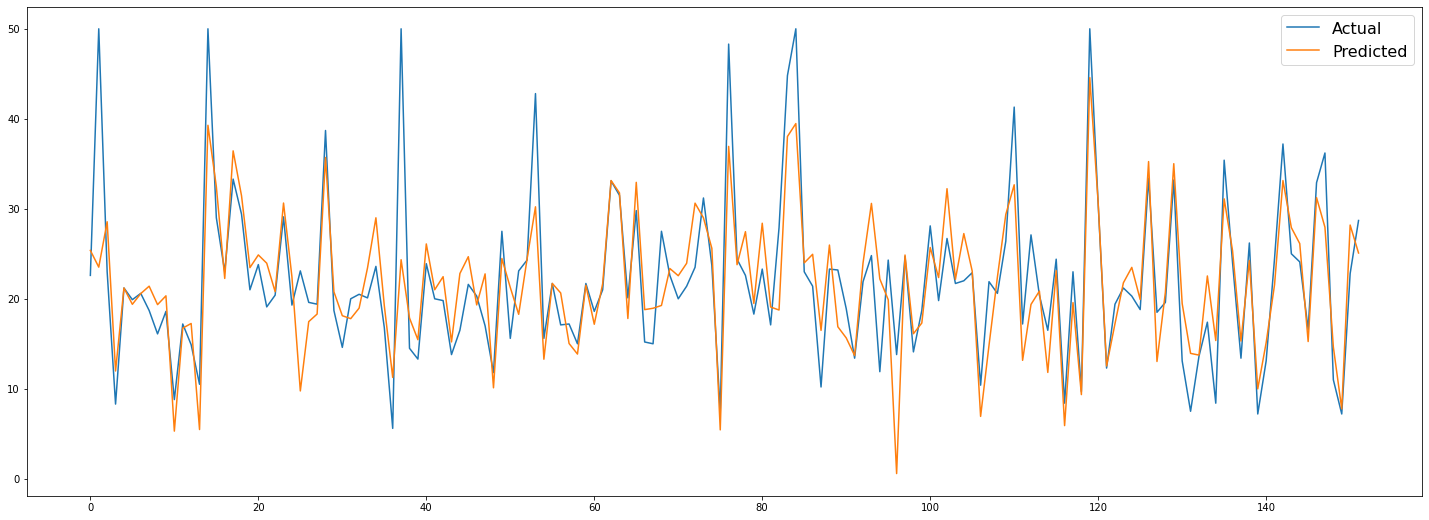

Mean Squared Error : 27.458999842815466


In [10]:
from matplotlib.pyplot import figure
plt.figure(figsize=(25,9))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_customsgd, label='Predicted')
plt.legend(prop={'size': 16})
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred_customsgd))

As we can see we got our MSE as 26.8 which is pretty decent.